In [11]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))

from dataframe_generator import *
from image_patching import *

In [12]:
df, split_variables = create_dataframe()
df

                             image_path category
0        ../data/CBIR_15-Scene/00/1.jpg  Bedroom
1        ../data/CBIR_15-Scene/00/2.jpg  Bedroom
2        ../data/CBIR_15-Scene/00/3.jpg  Bedroom
3        ../data/CBIR_15-Scene/00/4.jpg  Bedroom
4        ../data/CBIR_15-Scene/00/5.jpg  Bedroom
...                                 ...      ...
4480  ../data/CBIR_15-Scene/14/4481.jpg    Store
4481  ../data/CBIR_15-Scene/14/4482.jpg    Store
4482  ../data/CBIR_15-Scene/14/4483.jpg    Store
4483  ../data/CBIR_15-Scene/14/4484.jpg    Store
4484  ../data/CBIR_15-Scene/14/4485.jpg    Store

[4485 rows x 2 columns]


image_path category
0        ../data/CBIR_15-Scene/00/1.jpg  Bedroom
1        ../data/CBIR_15-Scene/00/2.jpg  Bedroom
2        ../data/CBIR_15-Scene/00/3.jpg  Bedroom
3        ../data/CBIR_15-Scene/00/4.jpg  Bedroom
4        ../data/CBIR_15-Scene/00/5.jpg  Bedroom
...                                 ...      ...
4480  ../data/CBIR_15-Scene/14/4481.jpg    Store
4481  ../data/CBIR_15-Scene/14/4482.jpg    Store
4482  ../data/CBIR_15-Scene/14/4483.jpg    Store
4483  ../data/CBIR_15-Scene/14/4484.jpg    Store
4484  ../data/CBIR_15-Scene/14/4485.jpg    Store

[4485 rows x 2 columns]

# Now we are going to work with 2 similar environments

In [13]:
df_similar = df[df['category'].isin(['Bedroom', 'LivingRoom'])]
df_similar

image_path    category
0        ../data/CBIR_15-Scene/00/1.jpg     Bedroom
1        ../data/CBIR_15-Scene/00/2.jpg     Bedroom
2        ../data/CBIR_15-Scene/00/3.jpg     Bedroom
3        ../data/CBIR_15-Scene/00/4.jpg     Bedroom
4        ../data/CBIR_15-Scene/00/5.jpg     Bedroom
...                                 ...         ...
1262  ../data/CBIR_15-Scene/04/1263.jpg  LivingRoom
1263  ../data/CBIR_15-Scene/04/1264.jpg  LivingRoom
1264  ../data/CBIR_15-Scene/04/1265.jpg  LivingRoom
1265  ../data/CBIR_15-Scene/04/1266.jpg  LivingRoom
1266  ../data/CBIR_15-Scene/04/1267.jpg  LivingRoom

[505 rows x 2 columns]

In [14]:
X = df_similar['image_path']
y = df_similar['category']
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=10)


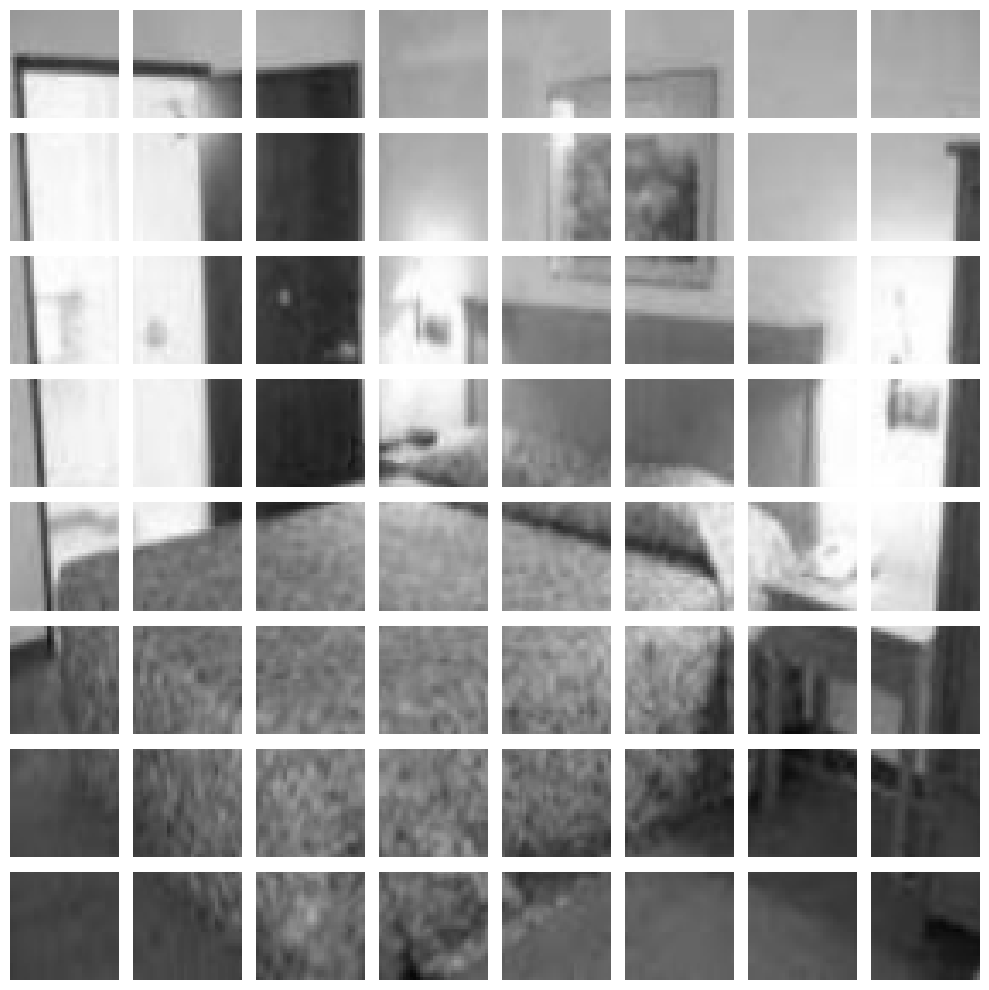

In [15]:
# Função para criar a grid de patches
def plot_patches_grid(patches, patch_size, grid_shape):
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(10, 10))
    patch_idx = 0
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            if patch_idx < len(patches):
                axes[i, j].imshow(cv2.cvtColor(patches[patch_idx], cv2.COLOR_BGR2RGB))
                axes[i, j].axis('off')
                patch_idx += 1
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

patch_size = (32,32)

# Carregar a primeira imagem de treino e criar os patches
first_image_path = X_train.iloc[0]
image = cv2.imread(first_image_path)
resized_image = resize_image(image, standard_size)
patches, positions = create_patches(resized_image, patch_size)

# Determinar o número de patches na grid
grid_rows = resized_image.shape[0] // patch_size[0]
grid_cols = resized_image.shape[1] // patch_size[1]

# Plotar a grid de patches
plot_patches_grid(patches, patch_size, (grid_rows, grid_cols))


In [16]:
create_images_set(X_train, X_test, y_train, y_test, patch_size, output_dir_train='patches_train', output_dir_test='patches_test')

In [17]:
patches_array = load_patches_by_category('patches_train', y, patch_size)


In [18]:
print(patches_array)

{'Bedroom': array([[243, 242, 243, ..., 255, 255, 255],
       [245, 244, 244, ..., 255, 255, 255],
       [161, 164, 168, ..., 243, 242, 242],
       ...,
       [168, 169, 168, ..., 132, 131, 130],
       [250, 234, 173, ...,  87,  90,  99],
       [190, 138, 124, ..., 105, 103, 101]], dtype=uint8), 'LivingRoom': array([[124, 122, 122, ..., 133, 132, 131],
       [ 55,  56,  56, ..., 215, 216, 223],
       [156, 157, 148, ...,  89, 107,  86],
       ...,
       [ 95,  73,  72, ..., 120, 119, 122],
       [ 44,  43,  43, ..., 253, 251, 251],
       [138, 124, 114, ..., 158, 151, 159]], dtype=uint8)}


In [21]:
from sklearn.decomposition import PCA

# Aplicar PCA para cada categoria e visualizar componentes
def apply_pca_and_visualize(patches_by_category, n_components=320):
	for category, patches in patches_by_category.items():
		if patches.size == 0:
				continue  # Pular se não houver patches para esta categoria
		
		pca = PCA(n_components=n_components)
		pca.fit(patches)
		components = pca.components_
		variance = pca.explained_variance_
		
		# Plotar os 320 primeiros componentes principais
		fig, axes = plt.subplots(16, 20, figsize=(20, 16))
		for i, ax in enumerate(axes.flatten()):
				ax.imshow(components[i].reshape(32, 32), cmap='gray')
				ax.axis('off')
		plt.suptitle(f'320 Primeiros Componentes Principais - Categoria: {category}')
		plt.show()
		
		# Plotar a log-variância dos componentes principais
		plt.figure(figsize=(10, 6))
		plt.plot(np.log(variance))
		plt.title(f'Log-Variância dos Componentes Principais - Categoria: {category}')
		plt.xlabel('Índice do Componente Principal')
		plt.ylabel('Log-Variância')
		plt.grid(True)
		plt.show()

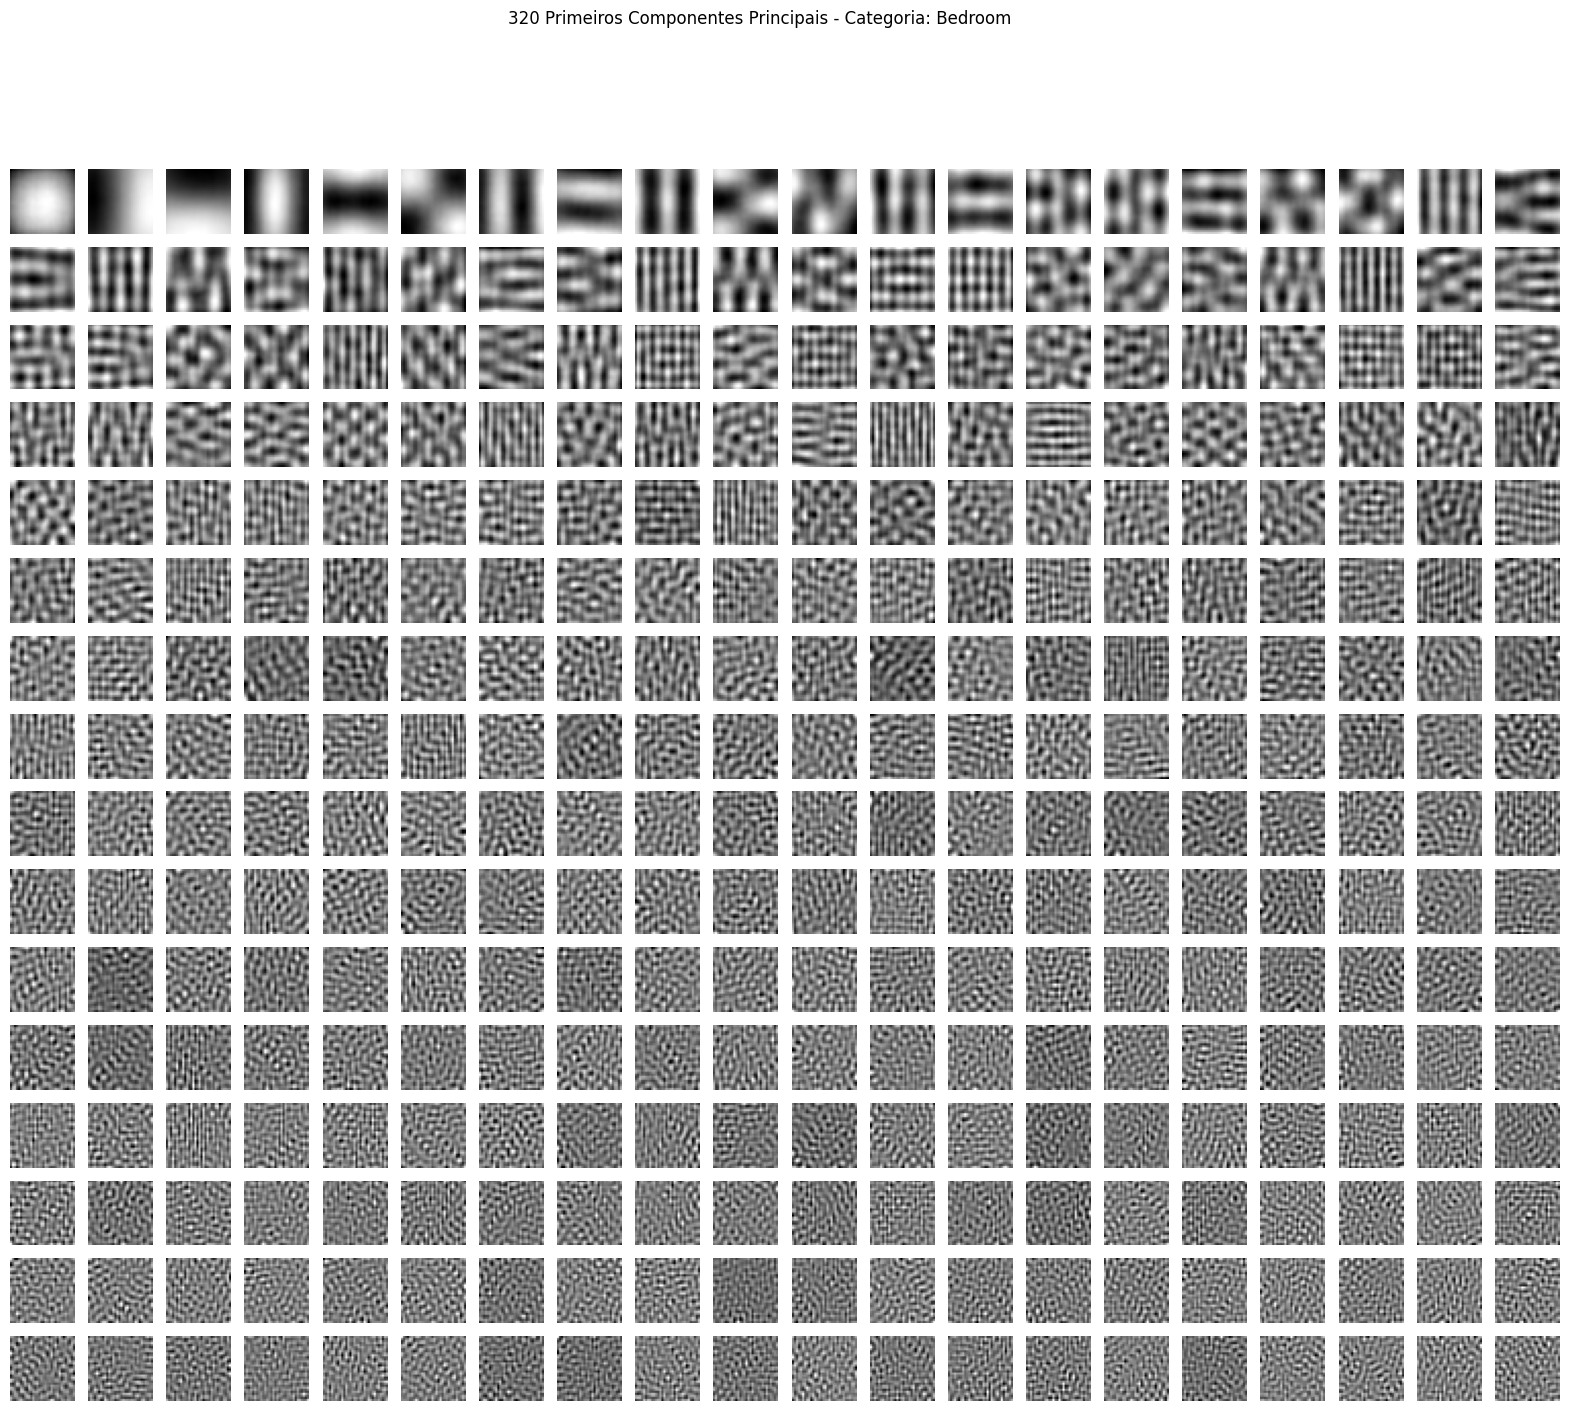

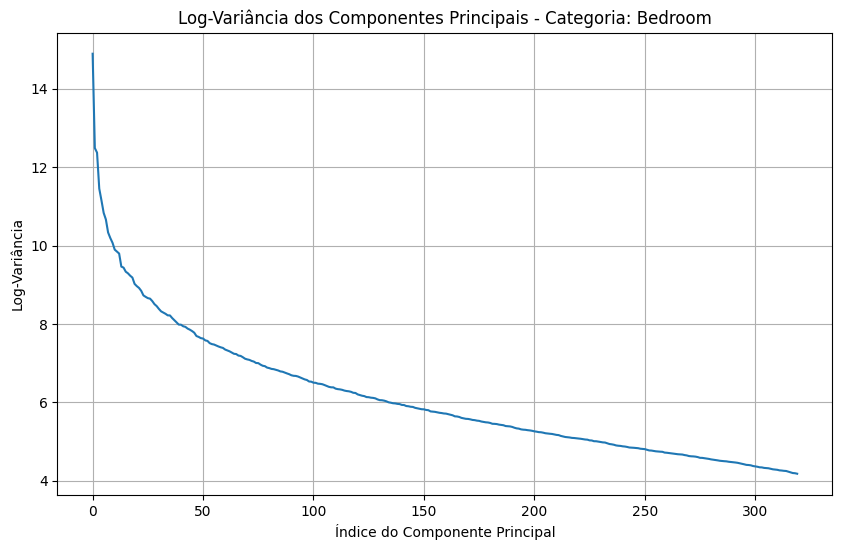

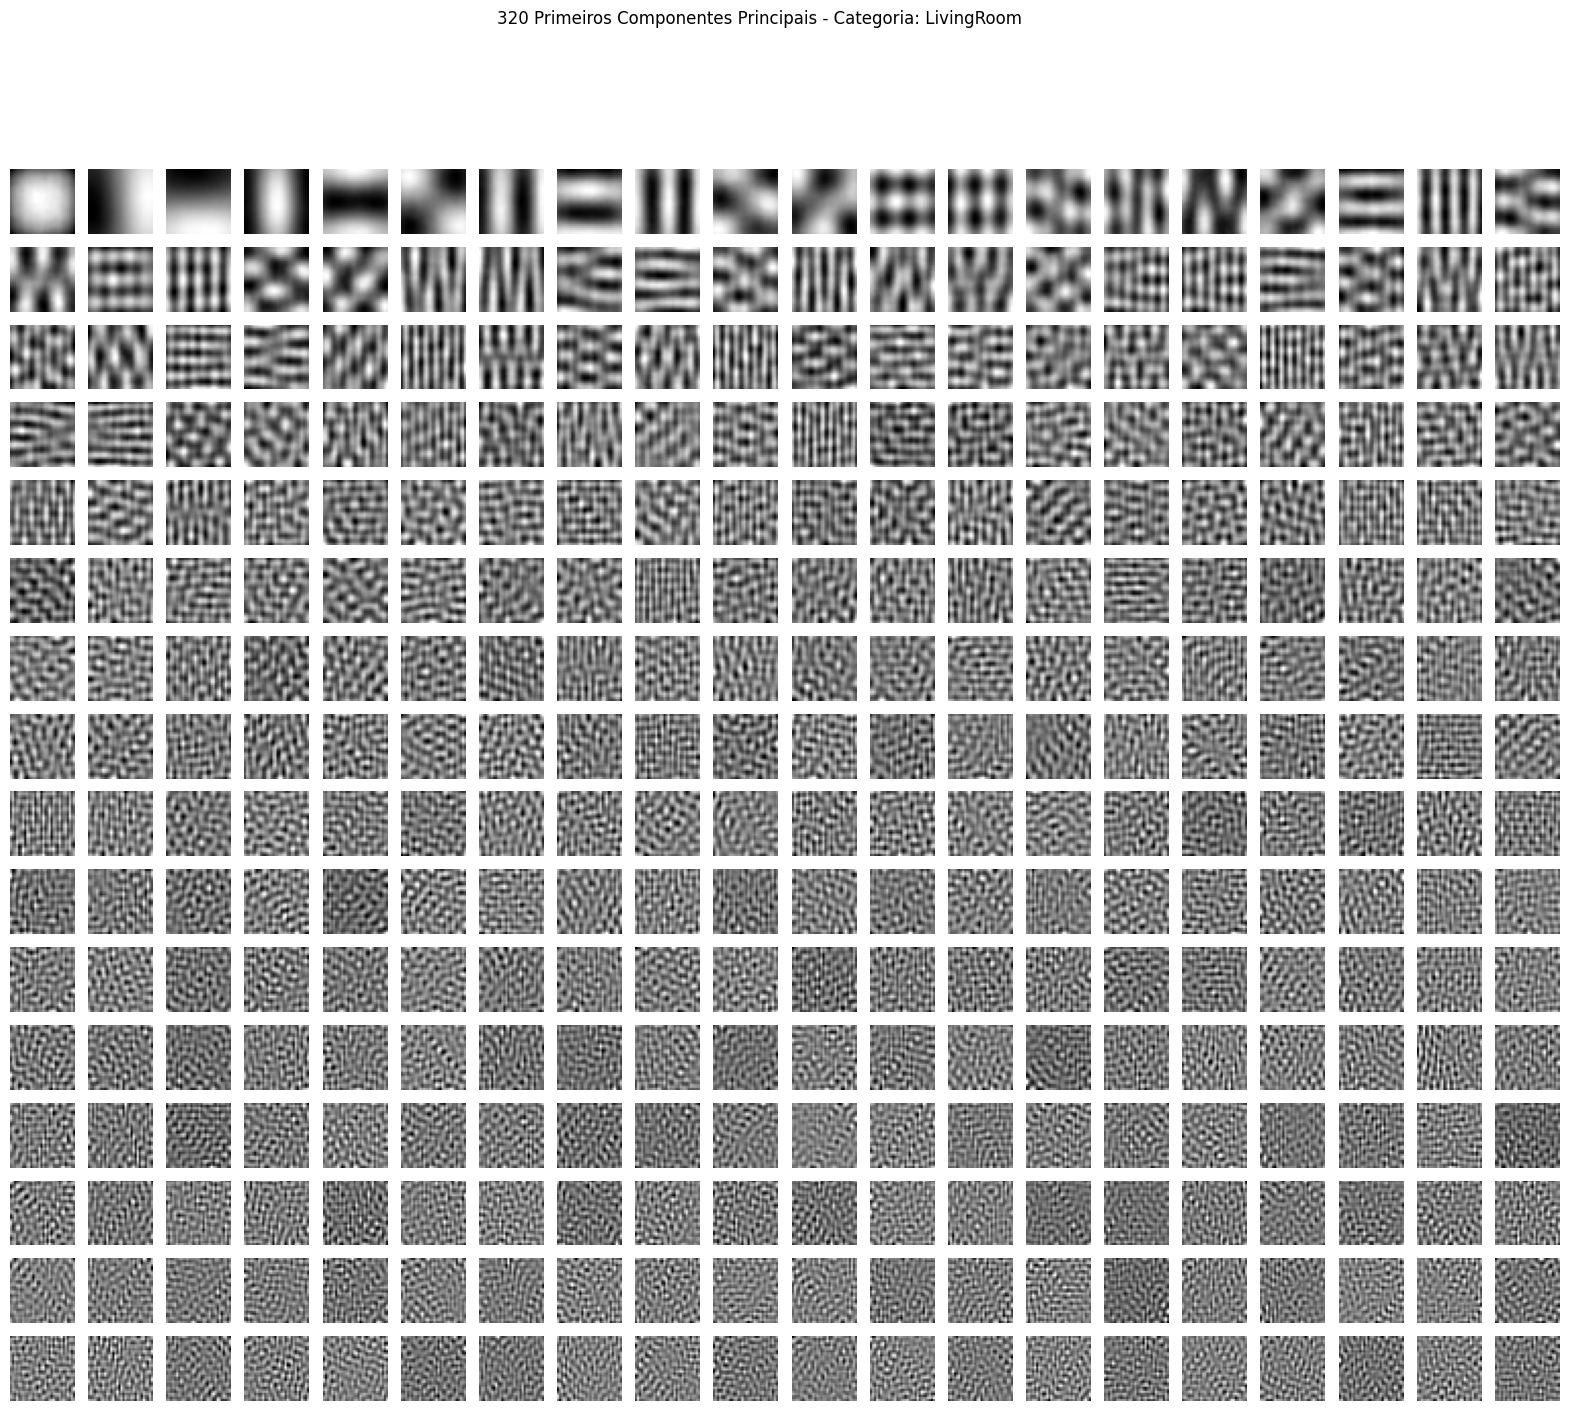

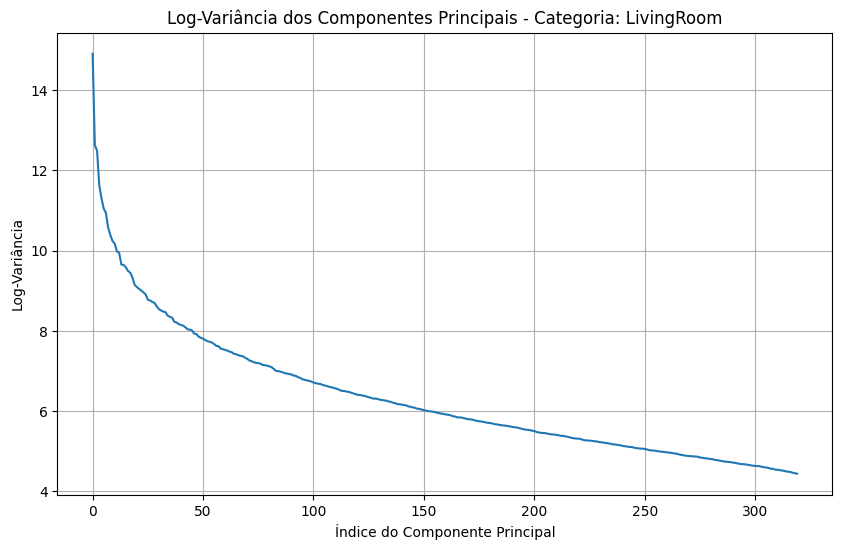

In [22]:
apply_pca_and_visualize(patches_array)